Notes

In [1]:
import pandas
from modsim import *

Questions

- How can population spikes and drops be used to identify significant events in a system?

- Can a model be used to identify population events, or do changes in population happen randomly/without explanation?

- How do those events affect populations of neighboring systems?

- How would populations be different today if those events never happened?

Possible Systems

- Russia and Germany, 1985 - 1995
- Rwanda and Burundi, 1985 - 2005
- Kenyan Rhino Population, 1973 - 1980
- Texas and Mexico, 1970 - present
- World Jewish Population, 1880 - present

In [43]:
rows = 64

ger_rus_data = pandas.read_csv('germany_russia.csv', 
                               low_memory=False, 
                               usecols=[0, 1, 2], 
                               nrows=rows, 
                               index_col=0)

#Import data from saved CSV file

In [44]:
germany = ger_rus_data.Germany / 1e6
russia = ger_rus_data.Russia / 1e6

#Save data from DataFrame, in ten millions

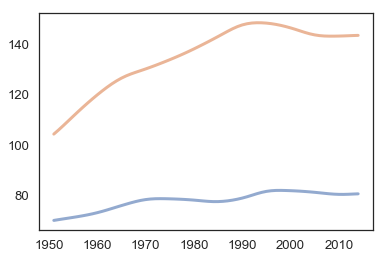

In [45]:
plot(germany)
plot(russia)

In [46]:
tg_0=get_first_label(germany)
tg_end=get_last_label(germany)
pg_0=get_first_value(germany) #Initialize German state values

tr_0=get_first_label(russia)
tr_end=get_last_label(russia)
pr_0=get_first_value(russia) #Initialize Russian state values

In [47]:
system=System(tg_0=tg_0,       #Initialize system object
             tg_end=tg_end,    #Note: state object is initialized in
             pg_0=pg_0,        #run_simulation method
             tr_0=tr_0,
             tr_end=tr_end,
             pr_0=pr_0,
             maxG=85,
             maxR=150,
             aG=.00035,
             aR=.0004)

In [48]:
def update_func_quad_germany(pop, t, system):
    net_growth_germany=system.aG*pop*(system.maxG-pop)
    return pop+net_growth_germany

def update_func_quad_russia(pop, t, system):
    net_growth_russia=system.aR*pop*(system.maxR-pop)
    return pop+net_growth_russia

In [53]:
def run_simulation_g(system, update_func_g):
    
    resultsg=TimeSeries()
    resultsg[system.tg_0]=system.pg_0
    
    for t in linrange(system.tg_0, system.tg_end):
        resultsg[t+1] = update_func_g(resultsg[t], t,system)
        
    return resultsg

def run_simulation_r(system, update_func_r):
    
    resultsr=TimeSeries()
    resultsr[system.tr_0]=system.pr_0
    
    for t in linrange(system.tr_0, system.tr_end):
        resultsr[t+1] = update_func_r(resultsr[t], t,system)
    return resultsr

In [54]:
def plot_results_g(real_g, real_r, mod_g, mod_r):
    plot(real_g, ':', label='Germany')
    plot(real_r, '--', label='Russia')
    plot(mod_g, color='blue', label='Germany Model')
    plot(mod_r, color='orange', label='Russia Model')
    
    decorate(xlabel='Year', 
             ylabel='Population (million)')

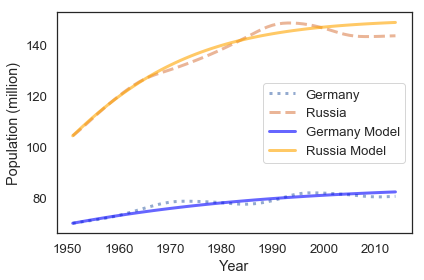

In [55]:
resultsg = run_simulation_g(system, update_func_quad_germany)
resultsr = run_simulation_r(system, update_func_quad_russia)

plot_results(germany, russia, resultsg, resultsr)

In [52]:
def get_relative_resid(real, model):
    results = TimeSeries()
    
    for t in linrange(real):
        results[t] = real[t] - model[t]
        
    

Sources

- www.rhinoresourcecenter.com/pdf_files/123/1236972547.pdf
- https://www.gapminder.org/data/
- http://countrystudies.us/germany/84.htm
    - "Originally brought in for three-year shifts, most workers--mainly single men--remained and made a valuable contribution to the booming West German economy." (2.5 million foreigners went to germany between 1955 and 1973)